Author : Clara Martinez

Visualisation Transformer/LLM architecture : https://bbycroft.net/llm

Encoder-Decoder architecture


 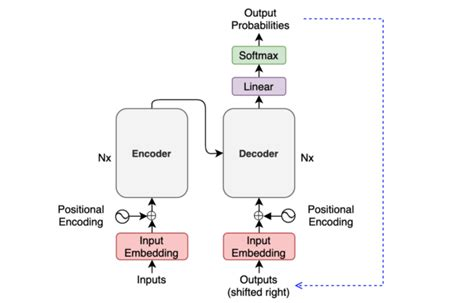

Transformer architecture

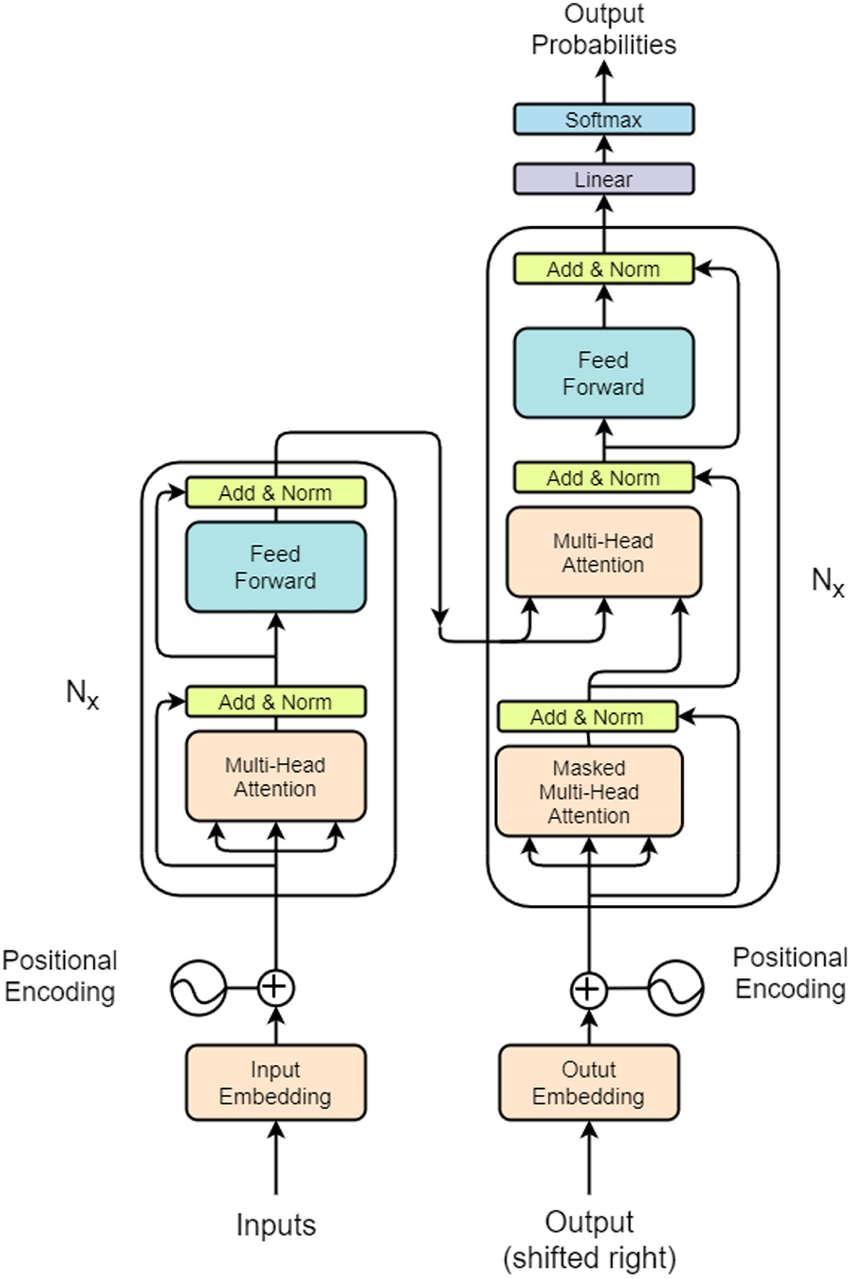

Simple Chatbot implementation

In [3]:
from nltk.tokenize import word_tokenize
import nltk

# Télécharger les ressources nécessaires pour la tokenisation
nltk.download('punkt')
nltk.download('punkt_tab')

# Étape 1 : Définir les intentions et les réponses
intents = {
    "greeting": ["hello", "hi", "hey"],
    "opening_hours": ["open", "opening", "hours"],
    "pricing": ["price", "cost", "how much", "fees", "membership"],
    "facilities": ["pool", "swimming", "gym", "equipment"]
}

responses = {
    "greeting": "Hello! How can I help you today?",
    "opening_hours": "We are open from 9 AM to 6 PM, Monday to Friday.",
    "pricing": "Our membership fees start at $30 per month.",
    "facilities": "Yes, we have a swimming pool and a fully equipped gym.",
    "default": "Sorry, I didn't understand that. Can you please rephrase?"
}

# Étape 2 : Construire le chatbot
def rule_based_chatbot(user_input):
    tokens = word_tokenize(user_input.lower())

    for intent, keywords in intents.items():
        if any(keyword in tokens for keyword in keywords):
            return responses[intent]

    return responses["default"]

# Étape 3 : Tester le chatbot
print(rule_based_chatbot("What are your opening hours?"))  # Output: We are open from 9 AM to 6 PM, Monday to Friday.
print(rule_based_chatbot("How much does it cost?"))        # Output: Our membership fees start at $30 per month.
print(rule_based_chatbot("Do you have a swimming pool?"))  # Output: Yes, we have a swimming pool and a fully equipped gym.
print(rule_based_chatbot("Tell me a joke"))                # Output: Sorry, I didn't understand that. Can you please rephrase?

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


We are open from 9 AM to 6 PM, Monday to Friday.
Our membership fees start at $30 per month.
Yes, we have a swimming pool and a fully equipped gym.
Sorry, I didn't understand that. Can you please rephrase?


Pour aller plus loin

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import nltk
from nltk.tokenize import word_tokenize
import numpy as np

# Télécharger les ressources nécessaires
nltk.download('punkt')

# Exemple de données d'entraînement
training_data = [
    ("hello", "greeting"),
    ("hi", "greeting"),
    ("hey", "greeting"),
    ("what are your opening hours", "opening_hours"),
    ("when do you open", "opening_hours"),
    ("how much does it cost", "pricing"),
    ("what are your membership fees", "pricing"),
    ("do you have a swimming pool", "facilities"),
    ("is there a gym", "facilities")
]

# Préparer les données
X_train = [word_tokenize(text.lower()) for text, label in training_data]
y_train = [label for text, label in training_data]

# Vectorisation
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)
X_train_tfidf = vectorizer.fit_transform(X_train)

# Entraîner un modèle de classification
classifier = LinearSVC()
classifier.fit(X_train_tfidf, y_train)

# Fonction de chatbot améliorée
def advanced_chatbot(user_input):
    tokens = word_tokenize(user_input.lower())
    X_test_tfidf = vectorizer.transform([tokens])
    intent = classifier.predict(X_test_tfidf)[0]
    return responses.get(intent, responses["default"])

# Tester le chatbot
print(advanced_chatbot("What are your opening hours?"))
print(advanced_chatbot("How much does it cost?"))
print(advanced_chatbot("Do you have a swimming pool?"))
print(advanced_chatbot("Tell me a joke"))

We are open from 9 AM to 6 PM, Monday to Friday.
Our membership fees start at $30 per month.
Yes, we have a swimming pool and a fully equipped gym.
Yes, we have a swimming pool and a fully equipped gym.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vectorisation TF-IDF : Utilisation de TF-IDF pour transformer les données textuelles en vecteurs numériques.

Classification SVM : Utilisation d'un classificateur SVM pour prédire l'intention de l'utilisateur.

Amélioration de la Compréhension : Le modèle peut mieux comprendre les variations dans les questions des utilisateurs grâce à l'apprentissage supervisé.

**Chatbot Text generation with Transformers**

Source : https://thepythoncode.com/article/conversational-ai-chatbot-with-huggingface-transformers-in-python

In [3]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Charge model and tokenizer

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "microsoft/DialoGPT-medium"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

In [5]:
# Fonction de chatbot avancée
def transformer_chatbot():
    chat_history_ids = None
    for step in range(5):
        # Prendre l'entrée de l'utilisateur
        text = input(">> You: ")
        # Encoder l'entrée et ajouter le token de fin de chaîne
        input_ids = tokenizer.encode(text + tokenizer.eos_token, return_tensors="pt")
        # Concaténer la nouvelle entrée utilisateur avec l'historique de chat (s'il y en a)
        bot_input_ids = torch.cat([chat_history_ids, input_ids], dim=-1) if step > 0 else input_ids
        # Générer une réponse du bot
        chat_history_ids = model.generate(
            bot_input_ids,
            max_length=1000,
            do_sample=True,
            top_k=50,
            top_p=0.95,
            temperature=0.75,
            pad_token_id=tokenizer.eos_token_id
        )
        # Décoder et afficher la réponse
        output = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
        print(f"DialoGPT: {output}")

# Lancer le chatbot
transformer_chatbot()

>> You: danse classique


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


DialoGPT: Haha, that's the first thing that came to my mind as well!
>> You: what is the capital of france?
DialoGPT: Paris. I'm on mobile, so I can't edit the post, but it's in French.
>> You: give me fruits 
DialoGPT: That's an excellent idea.


KeyboardInterrupt: Interrupted by user

Markov Chain model

In [8]:
from collections import defaultdict, Counter
import random

# Étape 1 : Prétraiter le texte et construire la matrice de transition
def build_markov_chain(text, n=2):
    words = text.split()
    transitions = defaultdict(Counter)

    for i in range(len(words) - n):
        current_state = tuple(words[i:i+n])
        next_state = words[i+n]
        transitions[current_state][next_state] += 1

    # Convertir les comptes en probabilités
    for current_state, next_states in transitions.items():
        total = sum(next_states.values())
        for next_state in next_states:
            next_states[next_state] /= total

    return transitions

# Étape 2 : Générer du texte en utilisant la chaîne de Markov
def generate_text(markov_chain, start_state, length=10, n=2):
    current_state = start_state
    text = list(current_state)

    for _ in range(length):
        if current_state not in markov_chain:
            break
        next_word = random.choices(
            list(markov_chain[current_state].keys()),
            list(markov_chain[current_state].values())
        )[0]
        text.append(next_word)
        current_state = tuple(text[-n:])

    return ' '.join(text)

# Exemple d'utilisation
text = "The cat sat on the mat. The cat was happy. The dog was jealous."
markov_chain = build_markov_chain(text, n=2)
start_state = ("The", "cat")
generated_text = generate_text(markov_chain, start_state, length=10, n=2)
print(generated_text)

The cat sat on the mat. The cat was happy. The dog


Le texte généré se termine par "The dog", ce qui peut sembler abrupt. Cela peut se produire si le modèle atteint un état pour lequel il n'y a pas de transition définie dans le texte d'entraînement, ou si la longueur spécifiée pour le texte généré est atteinte.